In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/letterrecognition-using-svm/letter-recognition.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
info = pd.read_csv('/kaggle/input/letterrecognition-using-svm/letter-recognition.csv')
info

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
X = info.drop('letter', axis=1) # Features (all columns except 'letter')
y = info['letter']             # Target variable
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique classes in target: {y.nunique()}")


Features shape: (20000, 16)
Target shape: (20000,)
Unique classes in target: 26


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 16000 samples
Test set size: 4000 samples


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fitting training data 
X_test_scaled = scaler.transform(X_test)     # Transform both train and test data

In [10]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # RBF is often a good start
# Train the model
svm_model.fit(X_train_scaled, y_train)
print("SVM model training complete.")

SVM model training complete.


In [12]:
# Accuracy
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9485


In [13]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.96      0.96       158
           B       0.87      0.95      0.91       153
           C       0.97      0.97      0.97       147
           D       0.90      0.96      0.93       161
           E       0.92      0.95      0.94       154
           F       0.94      0.94      0.94       155
           G       0.93      0.97      0.95       155
           H       0.86      0.86      0.86       147
           I       0.98      0.90      0.94       151
           J       0.94      0.97      0.95       149
           K       0.94      0.95      0.95       148
           L       0.99      0.93      0.96       152
           M       0.99      0.95      0.97       158
           N       0.95      0.94      0.94       157
           O       0.93      0.93      0.93       150
           P       0.99      0.93      0.96       161
           Q       0.97      0.96      0.96       157
   


Generating Confusion Matrix...


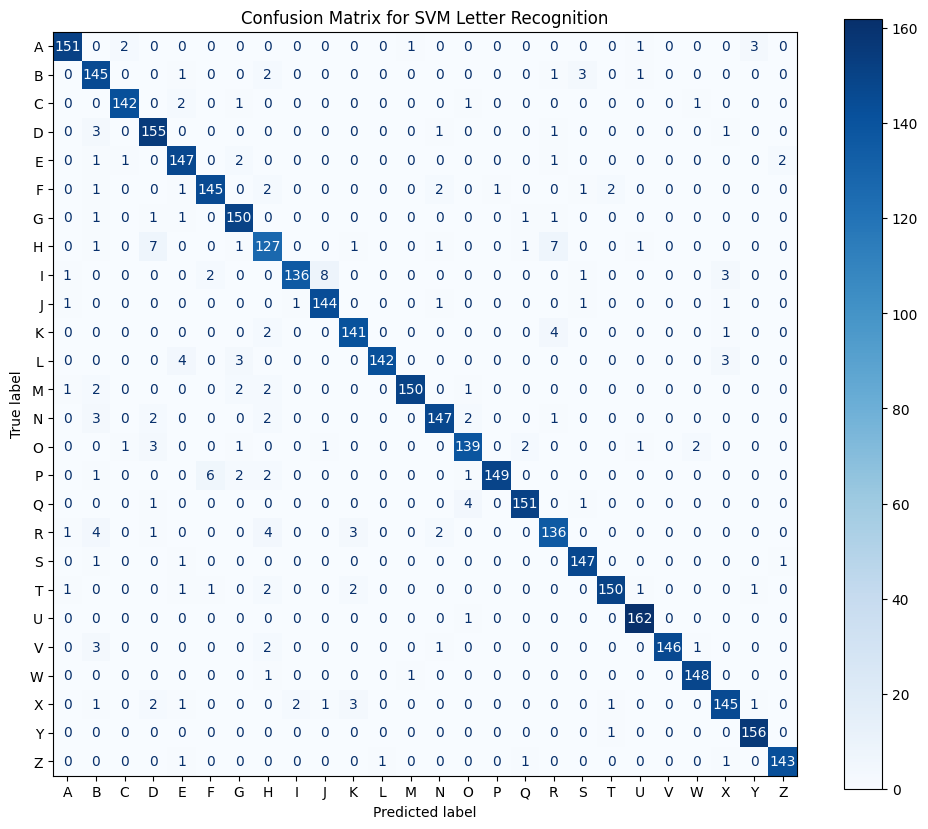

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix for SVM Letter Recognition')
plt.show()
